In [ ]:
import tensorflow as tf
from tensorflow import kerasda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = keras.datasets.fashion_mnist


In [ ]:
(train_images, train_labels), (test_images, test_labels ) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape
test_images.shape

(10000, 28, 28)

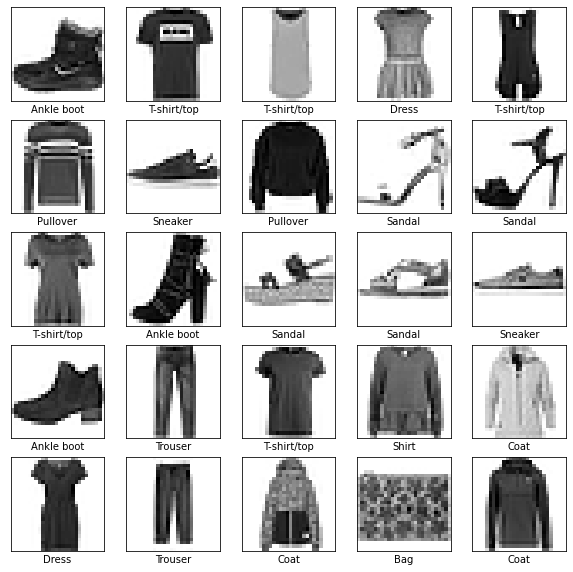

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

In [15]:
model.compile(optimizer="adam", loss= "sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4986 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3756 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2964 - accuracy: 0.8907


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8668


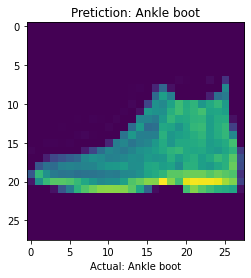

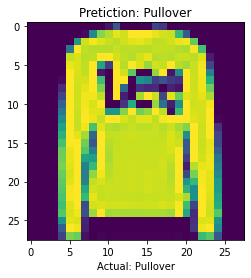

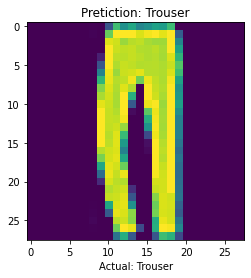

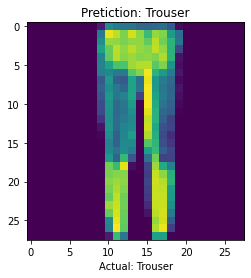

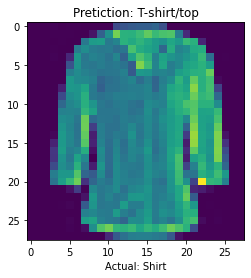

In [23]:
prediction  = model.predict(test_images)
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel("Actual: " + class_names[test_labels[i]])
  plt.title("Pretiction: " + class_names[np.argmax(prediction[i])])
  plt.show()